## Analysis of Burn Severity Data from USDA that shows post-fire analysis.

### Key Sites:
### Data Website - https://enterprisecontentnew-usfs.hub.arcgis.com/datasets/monitoring-trends-in-burn-severity-fire-occurrence-locations-feature-layer/data
### Explanation of Data Fields - https://www.mtbs.gov/faqs

Questions to uncover:
1) Using the coordinates and names, can we correlcte the fire events with the Emissions and NASA Data?
2) USDA Burn Severity Data comes in two csv files, therefore merging files below using "Merge".


In [3]:
import pandas as pd

In [4]:
burnsevocc = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/USFS Burn Severity #11 GDrive/Monitoring_Trends_in_Burn_Severity_Fire_Occurrence_Locations_Feature_Layer.csv')

In [5]:
burnsevbound = pd.read_csv('//Users/AlfHaugen/Python/Wildfire_Data/USFS Burn Severity #11 GDrive/Monitoring_Burned_Area_Boundaries_Feature_Layer.csv')

In [6]:
burnsevocc.head(1)

,X,Y,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,LONGITUDE,FIRE_TYPE,FIRE_NAME,GREENNESS_THRESHOLD,IG_DATE,ACRES
0,-81.280003,25.952005,1001,FL2595208128019860107,Initial (SS),NaN,50160421986000,-9999,460,-9999,-9999,25.952,-81.28,Prescribed Fire,BASSLK TRR,-9999,1986-01-07T00:00:00.000Z,2750


In [7]:
burnsevbound.head(1)

,OBJECTID,ACRES,FIRE_ID,FIRE_NAME,YEAR,STARTMONTH,STARTDAY,SHAPE_Length,SHAPE_Area,FIRE_TYPE
0,1,3419,AK5761615232120150828,TWIN CREEKS,2015,8,28,78088.826757,4.806401e+07,Wildfire


### Join data from one CSV into the other, using the FIRE_ID Key. 
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

In [8]:
### Create new dataframe, to then append data you want. 
burnsev = pd.merge(burnsevocc, 
                   burnsevbound[['FIRE_ID', 'YEAR', 'STARTMONTH', 'STARTDAY', 'SHAPE_Length', 'SHAPE_Area']],
                     on ='FIRE_ID', 
                    how ='left')
burnsev.head()

,X,Y,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,...,FIRE_TYPE,FIRE_NAME,GREENNESS_THRESHOLD,IG_DATE,ACRES,YEAR,STARTMONTH,STARTDAY,SHAPE_Length,SHAPE_Area
0,-81.280003,25.952005,1001,FL2595208128019860107,Initial (SS),NaN,50160421986000,-9999,460,-9999,...,Prescribed Fire,BASSLK TRR,-9999,1986-01-07T00:00:00.000Z,2750,1986,1,7,23991.127498,1.382207e+07
1,-97.235007,30.130005,1002,TX3015109722520110904,Extended,50270392010235,70270392012200,-970,70,293,...,Wildfire,BASTROP COUNTY COMPLEX,-150,2011-09-04T00:00:00.000Z,31838,2011,9,4,99452.447798,1.727783e+08
2,-107.527011,43.639007,1003,WY4363910752719960825,Initial,50360301995241,50360301996200,-970,110,286,...,Wildfire,BATES,-150,1996-08-25T00:00:00.000Z,47060,1996,8,25,160333.576454,3.637458e+08
3,-102.297009,31.818005,1004,TX3178810230220110403,Initial (SS),NaN,50300382011100,-9999,-60,-335,...,Wildfire,BATES FIELD FIRE,-9999,2011-04-03T00:00:00.000Z,3186,2011,4,3,24089.508521,1.791484e+07
4,-104.973009,33.180005,1005,NM3322210500120110807,Initial (SS),NaN,50320372011300,-9999,-70,-200,...,Wildfire,BATON ROUGE COMPLEX,-9999,2011-08-07T00:00:00.000Z,21641,2011,8,7,85216.044386,1.253726e+08


In [9]:
### Remove duplicated data columns. 
burnsev = burnsev.drop(['X', 'Y'], 1)

In [10]:
### List all Columns
for col in burnsev.columns: 
    print(col) 

OBJECTID
FIRE_ID
ASMNT_TYPE
PRE_ID
POST_ID
NODATA_THRESHOLD
LOW_THRESHOLD
MODERATE_THRESHOLD
HIGH_THRESHOLD
LATITUDE
LONGITUDE
FIRE_TYPE
FIRE_NAME
GREENNESS_THRESHOLD
IG_DATE
ACRES
YEAR
STARTMONTH
STARTDAY
SHAPE_Length
SHAPE_Area


In [11]:
### Narrowing down data with a new variable to determine if there are matching clusters/points in the Emissions and Nasa Data. 
bsyear = burnsev[(burnsev.YEAR == 2005) & (burnsev.LATITUDE > 45) & (burnsev.LONGITUDE < -120) & (burnsev.STARTMONTH == 7)]

In [12]:
bsyear.shape

(35, 21)

In [13]:
bsyear

,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,...,FIRE_TYPE,FIRE_NAME,GREENNESS_THRESHOLD,IG_DATE,ACRES,YEAR,STARTMONTH,STARTDAY,SHAPE_Length,SHAPE_Area
107,1108,AK6412215087220050716,Extended,70700152003221,50700152006200,-970,150,323,550,64.122,...,Wildfire,BEAR PAW MOUNTAIN,-150,2005-07-16T00:00:00.000Z,6832,2005,7,16,8.195422e+04,1.445481e+08
304,1305,AK6260115516920050720,Extended,70720162003123,50730162006100,-970,200,336,540,62.601,...,Wildfire,BLACK WATER,-150,2005-07-20T00:00:00.000Z,19388,2005,7,20,1.963452e+05,3.686744e+08
406,1407,AK6247715658320050721,Extended,70740162002246,50740162006200,-970,125,287,500,62.477,...,Wildfire,BIG WALDREN,-150,2005-07-21T00:00:00.000Z,13301,2005,7,21,2.652222e+05,2.508579e+08
562,1563,AK6451514109620050712,Extended,70650152004157,70650152006200,-970,150,323,550,64.515,...,Wildfire,BOUNDARY CREEK,-150,2005-07-12T00:00:00.000Z,149819,2005,7,12,5.227476e+05,3.261021e+09
1548,549,AK6702515276720050707,Initial,70730132001236,70730132006200,-970,35,253,500,67.025,...,Wildfire,ALATNA HILLS,-150,2005-07-07T00:00:00.000Z,6980,2005,7,7,8.745252e+04,1.845416e+08
1837,838,WA4743512020920050725,Initial,50450272004249,50450272005300,-970,90,9999,9999,47.435,...,Wildfire,BADGER ROAD,-150,2005-07-25T00:00:00.000Z,3990,2005,7,25,4.851671e+04,3.526673e+07
2662,2663,AK6754214686420050725,Extended,70700132000229,50700132006200,-970,195,399,660,67.542,...,Wildfire,CHEKHECHUNNJIK CREEK,-100,2005-07-25T00:00:00.000Z,17562,2005,7,25,2.104881e+05,4.860781e+08
3256,3257,AK6718214232420050724,Extended,50680132003199,50670132006200,-970,150,344,590,67.182,...,Wildfire,COLEEN MOUNTAIN,-150,2005-07-24T00:00:00.000Z,131623,2005,7,24,9.615297e+05,3.540198e+09
4363,5364,AK6696914320220050725,Extended,50680132003199,50670132006200,-970,150,347,595,66.969,...,Wildfire,JOHN HERBERTS VILLAGE,-150,2005-07-25T00:00:00.000Z,15263,2005,7,25,1.593053e+05,4.016792e+08
4921,5922,AK6408715802720050729,Extended,70750152003240,50750152006300,-970,180,350,580,64.087,...,Wildfire,KALYUH HILL,-150,2005-07-29T00:00:00.000Z,9302,2005,7,29,1.368576e+05,1.963088e+08


### Pulling in Emissions Data to run a comparison to a sampled point from the Burn Severity Data; Wood Gulch Fire. 

In [14]:
import pandas as pd
emdata = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/Missoula Emisions Data RDS-2017-0039/Emissions_Year/emissions_year2003to2015.csv')

In [15]:
emyear2005 = emdata[(emdata.year == 2005) & (emdata.latitude > 45) & (emdata.longitude < -120)]
emyear2005.head()

,id,year,doy,longitude,latitude,grid10k,covertype,fuelcode,area_burned,prefire_fuel,...,ECO,ECH4,EPM2.5,cwd_frac,duff_frac,fuel_moisture_class,burn_source,burnday_source,BSEV,BSEV_flag
5409205,281509,2005,205,-120.2158,45.7800,115299,1,1,62500.0,159.722550,...,10.397938,0.398092,1.515128,0.0,0.0,2,1,15,2,0
5409206,281510,2005,205,-120.2127,45.7806,115299,2,2,62500.0,361.253178,...,22.758950,0.871343,3.316304,0.0,0.0,2,1,15,2,0
5409207,281511,2005,205,-120.2096,45.7812,115299,1,1,0.0,128.786814,...,8.384022,0.320988,1.221672,0.0,0.0,2,1,15,1,0
5409208,281512,2005,205,-120.2065,45.7817,115299,1,1,62500.0,123.294600,...,8.026478,0.307299,1.169573,0.0,0.0,2,1,15,2,0
5409209,281513,2005,205,-120.2034,45.7823,115299,1,1,62500.0,112.422258,...,7.318689,0.280201,1.066438,0.0,0.0,2,1,15,2,0


In [16]:
emyear2005 = emdata[(emdata.year == 2005) & (emdata.latitude > 45.6) & (emdata.latitude < 45.99) & (emdata.longitude < -119) & (emdata.longitude > -120.8) & (emdata.doy > 204) & (emdata.doy < 210)]
emyear2005.head()
emyear2005.shape

(487, 22)

In [17]:
### Display results from honing in on grid area:
emyear2005[['latitude', 'longitude', 'year', 'doy', 'ECO']]

,latitude,longitude,year,doy,ECO
5409205,45.7800,-120.2158,2005,205,10.397938
5409206,45.7806,-120.2127,2005,205,22.758950
5409207,45.7812,-120.2096,2005,205,8.384022
5409208,45.7817,-120.2065,2005,205,8.026478
5409209,45.7823,-120.2034,2005,205,7.318689
5409240,45.7822,-120.2166,2005,205,9.792304
5409241,45.7828,-120.2135,2005,205,22.780134
5409242,45.7833,-120.2104,2005,205,9.478541
5409243,45.7839,-120.2073,2005,205,7.997291
5409244,45.7845,-120.2042,2005,205,20.824122


In [18]:
### Write results to a new csv to review. 
emyear2005.to_csv('/Users/AlfHaugen/Python/Wildfire_Data/Predicting-Wildfires/emyear2005v1.csv', encoding='utf-8')

<function matplotlib.pyplot.show(*args, **kw)>

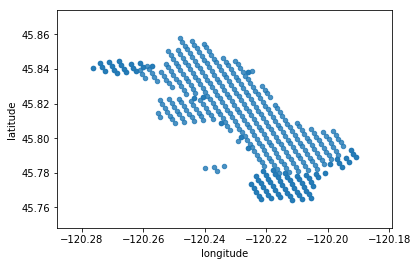

In [20]:
import matplotlib.pyplot as plt
emyear2005.plot(kind="scatter", x="longitude", y="latitude",alpha=0.8)

plt.show